1 - Importing libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from scipy.stats import f_oneway
from scipy import stats
from scipy.stats import chi2_contingency


In [2]:
#Dataset Columns:
#Person ID: An identifier for each individual.
#Gender: The gender of the person (Male/Female).
#Age: The age of the person in years.
#Occupation: The occupation or profession of the person.
#Sleep Duration (hours): The number of hours the person sleeps per day.
#Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
#Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
#Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
#BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
#Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
#Heart Rate (bpm): The resting heart rate of the person in beats per minute.
#Daily Steps: The number of steps the person takes per day.
#Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [3]:
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [4]:
display(data.head(15))
display(data.info())
display(data.describe())

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


None

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
data = data.drop('Person ID', axis=1)


In [6]:
display(data['Occupation'].unique())
display(data['BMI Category'].unique())
display(data['Sleep Disorder'].unique())
display(data['Blood Pressure'].unique())
#data1 = data.groupby('Occupation').apply(lambda x: x.sort_values('Stress Level', ascending=False))
#display(data1)

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

2 - Comparing Sleep Disroder with the other variables

In [7]:
for coluna in data.columns:
    grafico =  px.histogram(data, x=coluna, color='Sleep Disorder')
    grafico.show()

In [8]:
pie0 = px.pie(data, names='Gender', title='Gender')
pie1 = px.pie(data, names='BMI Category', title='BMI Category')
pie0.show()
pie1.show()
#Sleep Disorder
    #0 - Insomnia
    #1 - Sleep Apnea
    #2 - NaN
#BMI Category
    # Normal 0
    # Overwight 3
    # Normal Weight 1
    # Obese 2

#It was found that 58.6% of the participants do not have sleep disorders

 3 - Assigning Numeric Values to Text Columns

In [9]:
#Transformar as colunas 'BMI Category' e 'Sleep Disorder' em valores numéricos
data_for_test = data

#changing data type
encoder = LabelEncoder()
data_for_test['BMI Category'] = encoder.fit_transform(data['BMI Category'])
data_for_test['Sleep Disorder'] = encoder.fit_transform(data['Sleep Disorder'])
#Sleep Disorder
    #0 - Insomnia
    #1 - Sleep Apnea
    #2 - NaN
#BMI Category
    # Overwight 3
    # Normal 0
    # Obese 2
    # Normal Weight 1

4 - Checking if the data differ statistically

In [10]:
# Hypothesis test: Student's t test
f_stat, p_value = f_oneway(data_for_test['Age'], data_for_test['Sleep Duration'], data_for_test['Quality of Sleep'], data_for_test['Physical Activity Level'], data_for_test['Stress Level'], data_for_test['BMI Category'],data_for_test['Sleep Disorder'])

if p_value < 0.05:
    print("→ There is a significant difference between the means of the groups.")
else:
    print("x There is no significant difference between the means of the groups.")

→ There is a significant difference between the means of the groups.


In [11]:
# Statistical tests
#dependent is Sleep Disorder data['Sleep Disorder']
#independent are the other data['Age'], data['Sleep Duration'], data['Quality of Sleep'], data['Physical Activity Level'], data['Stress Level'], data['BMI Category']

# Linear Regression
X = sm.add_constant(data_for_test['Sleep Duration'])
model = sm.OLS(data_for_test['Sleep Disorder'], X).fit()
display(model.summary())
print('------------')

# Pearson coefficient
#corr_coefficient, p_value = stats.pearsonr(data['Sleep Disorder'], data['Sleep Duration'])
#print(f"Pearson's correlation coefficient: {corr_coefficient}")
#print(f"P-valor: {p_value}")
#print('------------')

# Pearson coefficient

numeric_columns = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
                   'BMI Category', 'Heart Rate', 'Daily Steps']


for i in numeric_columns:
    corr_coefficient, p_value = stats.pearsonr(data_for_test['Sleep Disorder'], data_for_test[i])
    print(f"Pearson's correlation {i} coefficient: {corr_coefficient}")
    print(f"P-valor: {p_value}")
    print('------------')

# Chi-Square
contingency_table = pd.crosstab(data_for_test['Sleep Duration'], data_for_test['Sleep Disorder'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print("→ There is a significant relationship between the variables.")
else:
    print("There is no significant relationship between the variables.")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Sleep Disorder   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     63.58
Date:                Wed, 02 Aug 2023   Prob (F-statistic):           1.92e-14
Time:                        10:32:33   Log-Likelihood:                -419.84
No. Observations:                 374   AIC:                             843.7
Df Residuals:                     372   BIC:                             851.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.3792      0.348     -3.962      0.000      -2.064      -0.695
Sleep Duration     0.3868      0.049      7.973      0.000       0.291       0.482
==============================================================================
Omnibus:                       91.847   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.317
Skew:                          -0.528   Prob(JB):                     5.83e-08
Kurtosis:                       1.989   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

------------
Pearson's correlation Age coefficient: -0.3039616378694374
P-valor: 1.9581255969692247e-09
------------
Pearson's correlation Sleep Duration coefficient: 0.3820451694029506
P-valor: 1.9177920083864673e-14
------------
Pearson's correlation Quality of Sleep coefficient: 0.3574769928499272
P-valor: 1.0258166304475945e-12
------------
Pearson's correlation Physical Activity Level coefficient: 0.10922474368420992
P-valor: 0.03472450739218501
------------
Pearson's correlation Stress Level coefficient: -0.18129567346931066
P-valor: 0.0004257299593573251
------------
Pearson's correlation BMI Category coefficient: -0.7257857637614566
P-valor: 2.0836795960930395e-62
------------
Pearson's correlation Heart Rate coefficient: -0.2209125963346883
P-valor: 1.6227770074279377e-05
------------
Pearson's correlation Daily Steps coefficient: 0.16127451741873589
P-valor: 0.0017542180033463923
------------
→ There is a significant relationship between the variables.


De acordo com os dados, pode-se observar que tem-se uma relação inversa nos parametros idade, nivel de estresse, IMC, Frequencia cardiaca e uma relação não proporcional de mesma ordem nos sono, qualidade do sono, atividade física e passos diários


Based on the data, an inverse relationship is observed among age, stress level, BMI, and heart rate. Additionally, there is a non-proportional relationship in the same direction for sleep, sleep quality, physical activity, and daily steps.

Pairplot

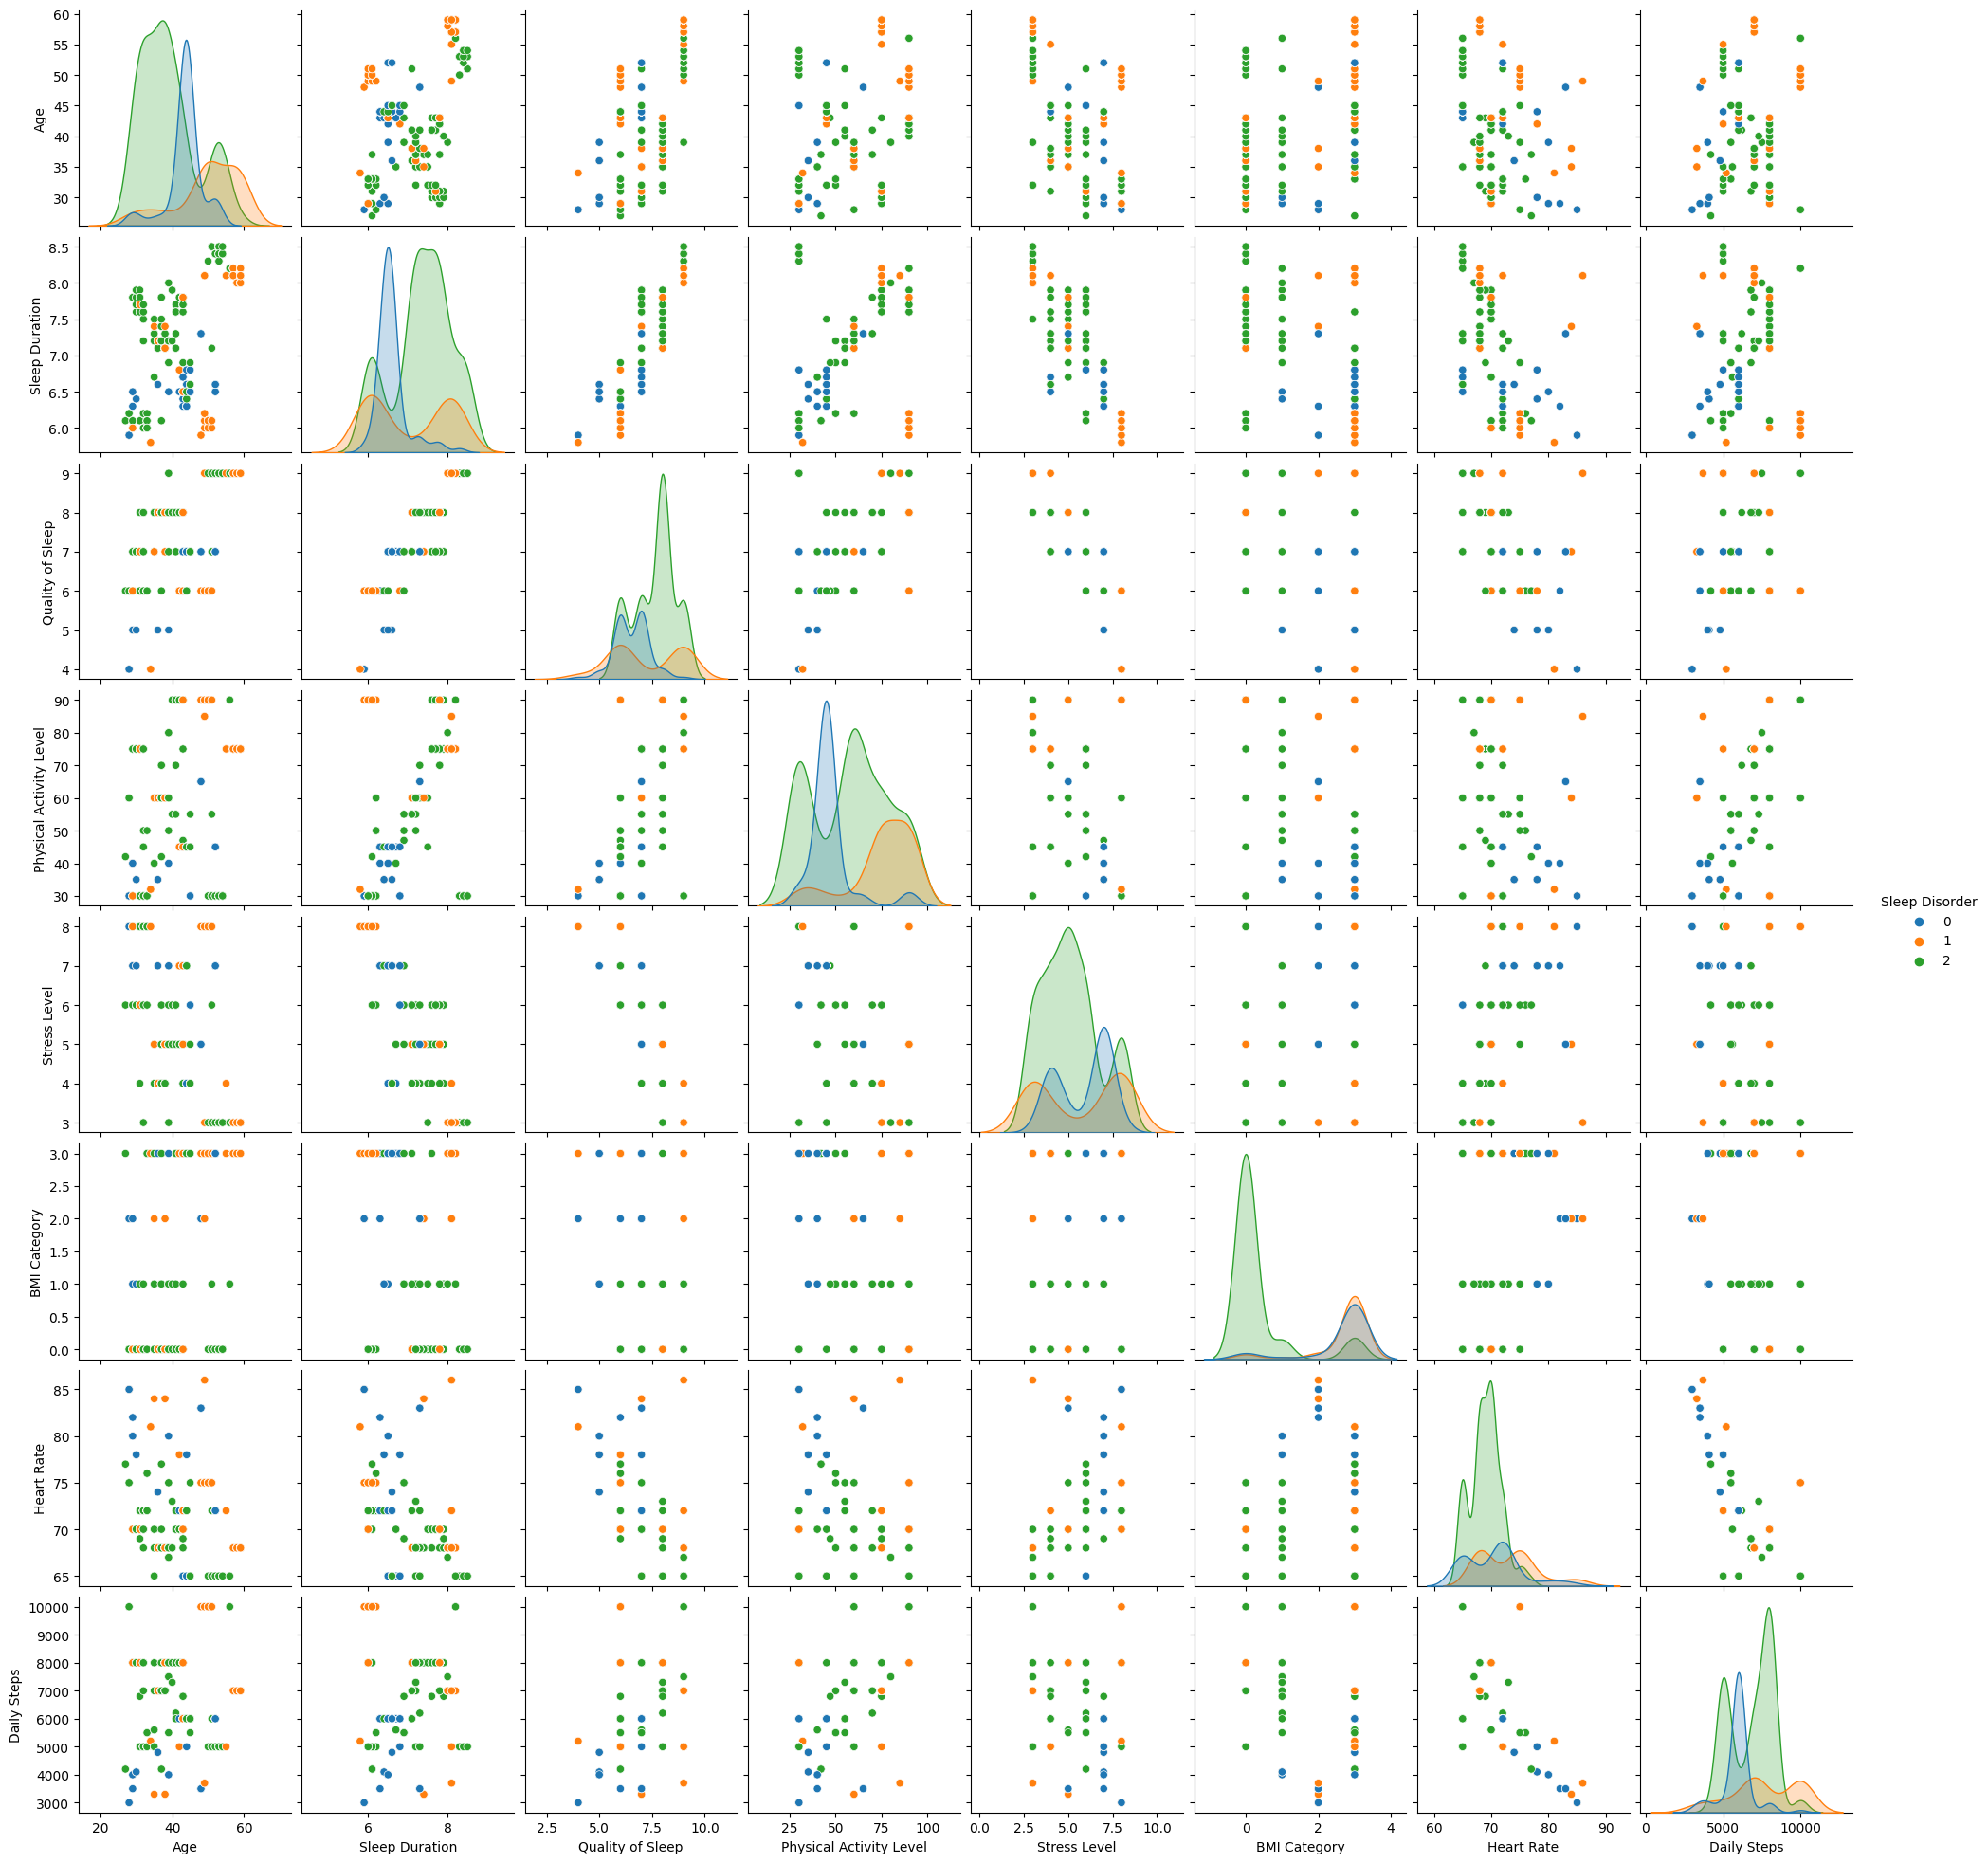

In [12]:
sns.pairplot(data, hue='Sleep Disorder', palette='tab10');
#Sleep Disorder
    #0 - Insomnia
    #1 - Sleep Apnea
    #2 - NaN